In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load npz file
data = np.load('dataset/qm9_1000_rff.npz')
keys = list(data.keys())

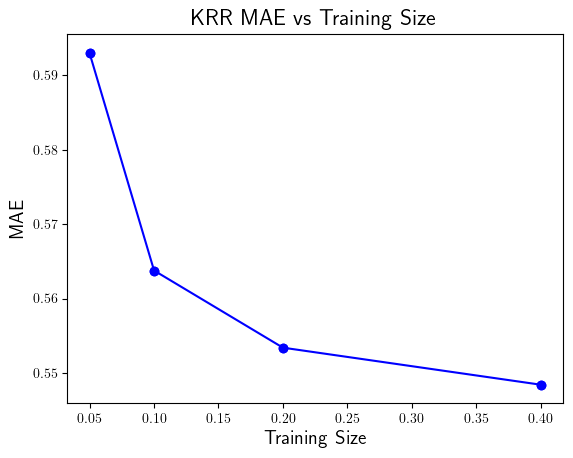

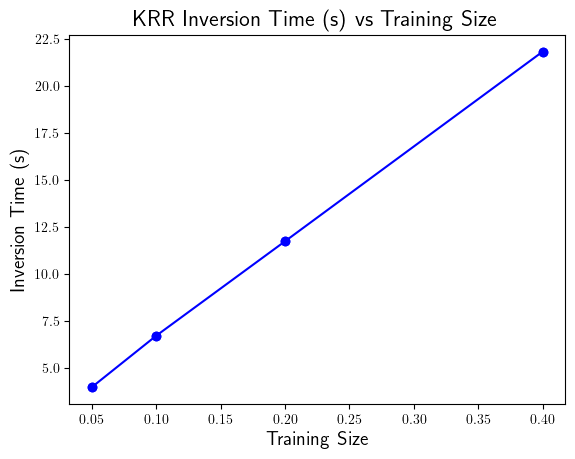

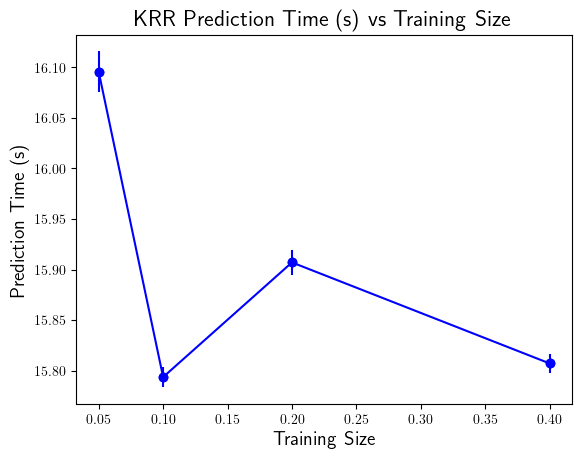

In [5]:
plt.rc('text', usetex=True)
x_axis = [0.05, 0.1, 0.2, 0.4]
y_label_dict = {'maes': 'MAE', 'inversion_time': 'Inversion Time (s)', 'prediction_time': 'Prediction Time (s)'}
for key in keys:
    summed = np.sum(data[key], axis=0)
    stddev = np.std(data[key], axis=0, ddof=0)
    # Set x axis values from x_axis
    # plt.xticks(np.arange(summed.shape[0]), x_axis)
    plt.plot(x_axis, summed, marker='o', color='b')
    plt.errorbar(x_axis, summed, yerr=stddev, color='b', fmt='o')
    plt.ylabel(y_label_dict[key], fontsize=14)
    plt.xlabel('Training Size', fontsize=14)
    plt.title('KRR ' + y_label_dict[key] + ' vs Training Size', fontsize=16)
    plt.savefig('KRR_QM9_training_size_vs_' + key + '.pdf')
    plt.show()

In [7]:
richard_data = np.load('time_diff/RFF_n500.npz')
richard_data_keys = list(richard_data.keys())

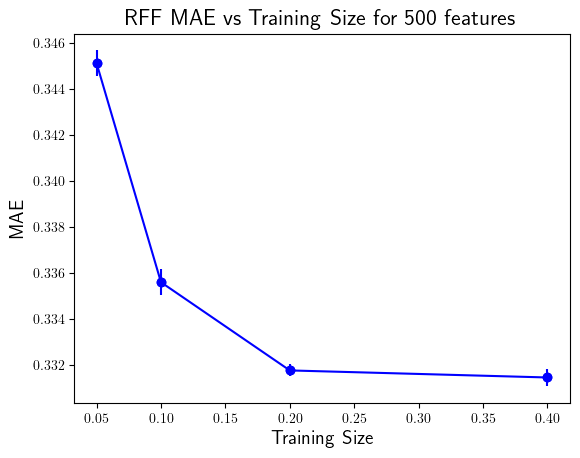

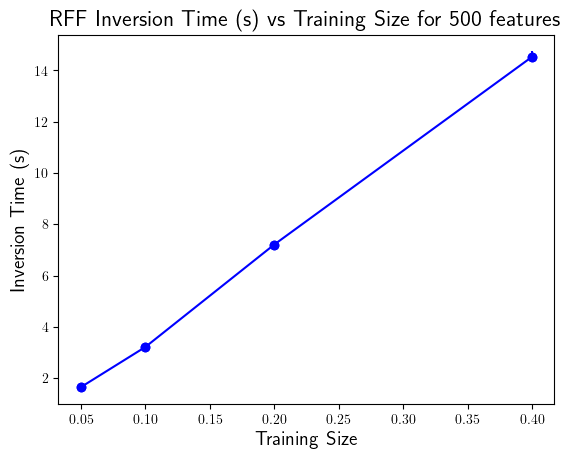

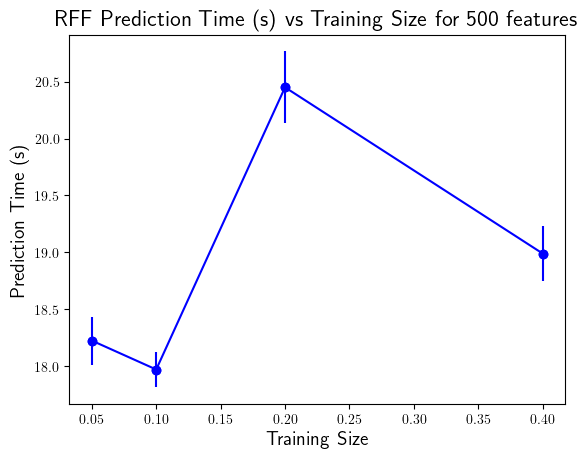

In [12]:
plt.rc('text', usetex=True)
x_axis = [0.05, 0.1, 0.2, 0.4]
y_label_dict = {'maes': 'MAE', 'time_to_invert': 'Inversion Time (s)', 'time_to_predict': 'Prediction Time (s)'}
for key in richard_data_keys:
    summed = np.sum(richard_data[key], axis=0)
    stddev = np.std(richard_data[key], axis=0, ddof=0)
    # Set x axis values from x_axis
    # plt.xticks(np.arange(summed.shape[0]), x_axis)
    plt.plot(x_axis, summed, marker='o', color='b')
    plt.errorbar(x_axis, summed, yerr=stddev, color='b', fmt='o')
    plt.ylabel(y_label_dict[key], fontsize=14)
    plt.xlabel('Training Size', fontsize=14)
    plt.title('RFF ' + y_label_dict[key] + ' vs Training Size for 500 features', fontsize=16)
    plt.savefig('RFF_500_QM9_training_size_vs_' + key + '.pdf')
    plt.show()

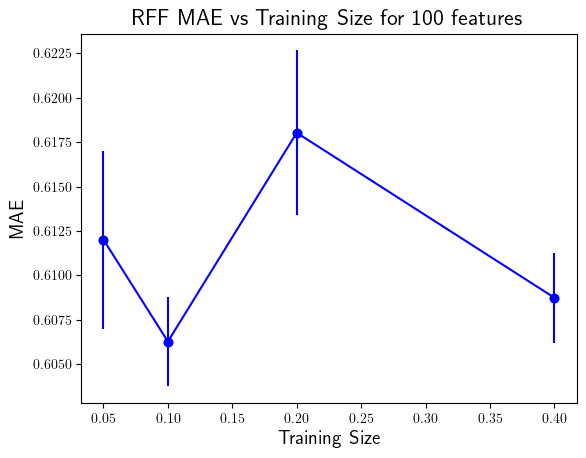

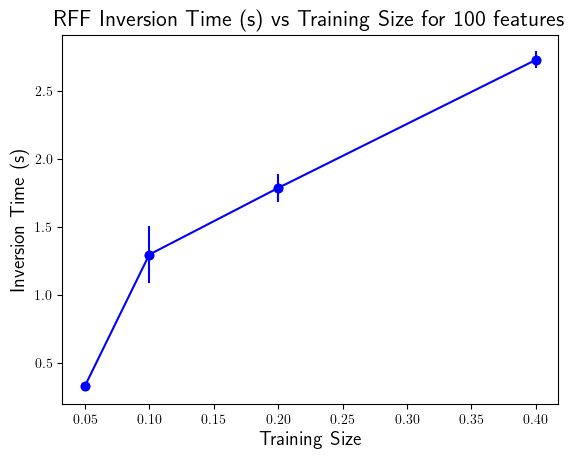

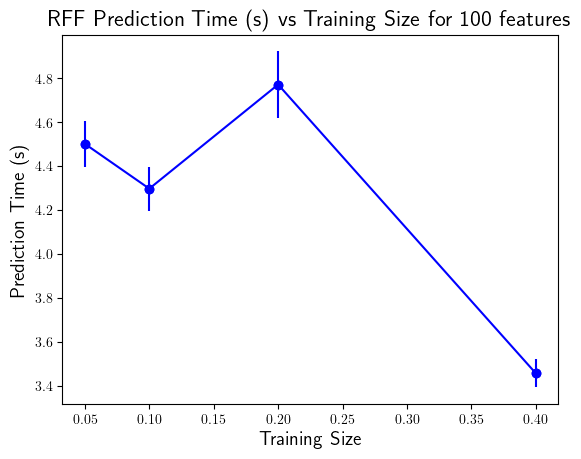

In [13]:
richard_data = np.load('time_diff/RFF_n100.npz')
richard_data_keys = list(richard_data.keys())

plt.rc('text', usetex=True)
x_axis = [0.05, 0.1, 0.2, 0.4]
y_label_dict = {'maes': 'MAE', 'time_to_invert': 'Inversion Time (s)', 'time_to_predict': 'Prediction Time (s)'}
for key in richard_data_keys:
    summed = np.sum(richard_data[key], axis=0)
    stddev = np.std(richard_data[key], axis=0, ddof=0)
    # Set x axis values from x_axis
    # plt.xticks(np.arange(summed.shape[0]), x_axis)
    plt.plot(x_axis, summed, marker='o', color='b')
    plt.errorbar(x_axis, summed, yerr=stddev, color='b', fmt='o')
    plt.ylabel(y_label_dict[key], fontsize=14)
    plt.xlabel('Training Size', fontsize=14)
    plt.title('RFF ' + y_label_dict[key] + ' vs Training Size for 100 features', fontsize=16)
    plt.savefig('RFF_100_QM9_training_size_vs_' + key + '.pdf')
    plt.show()

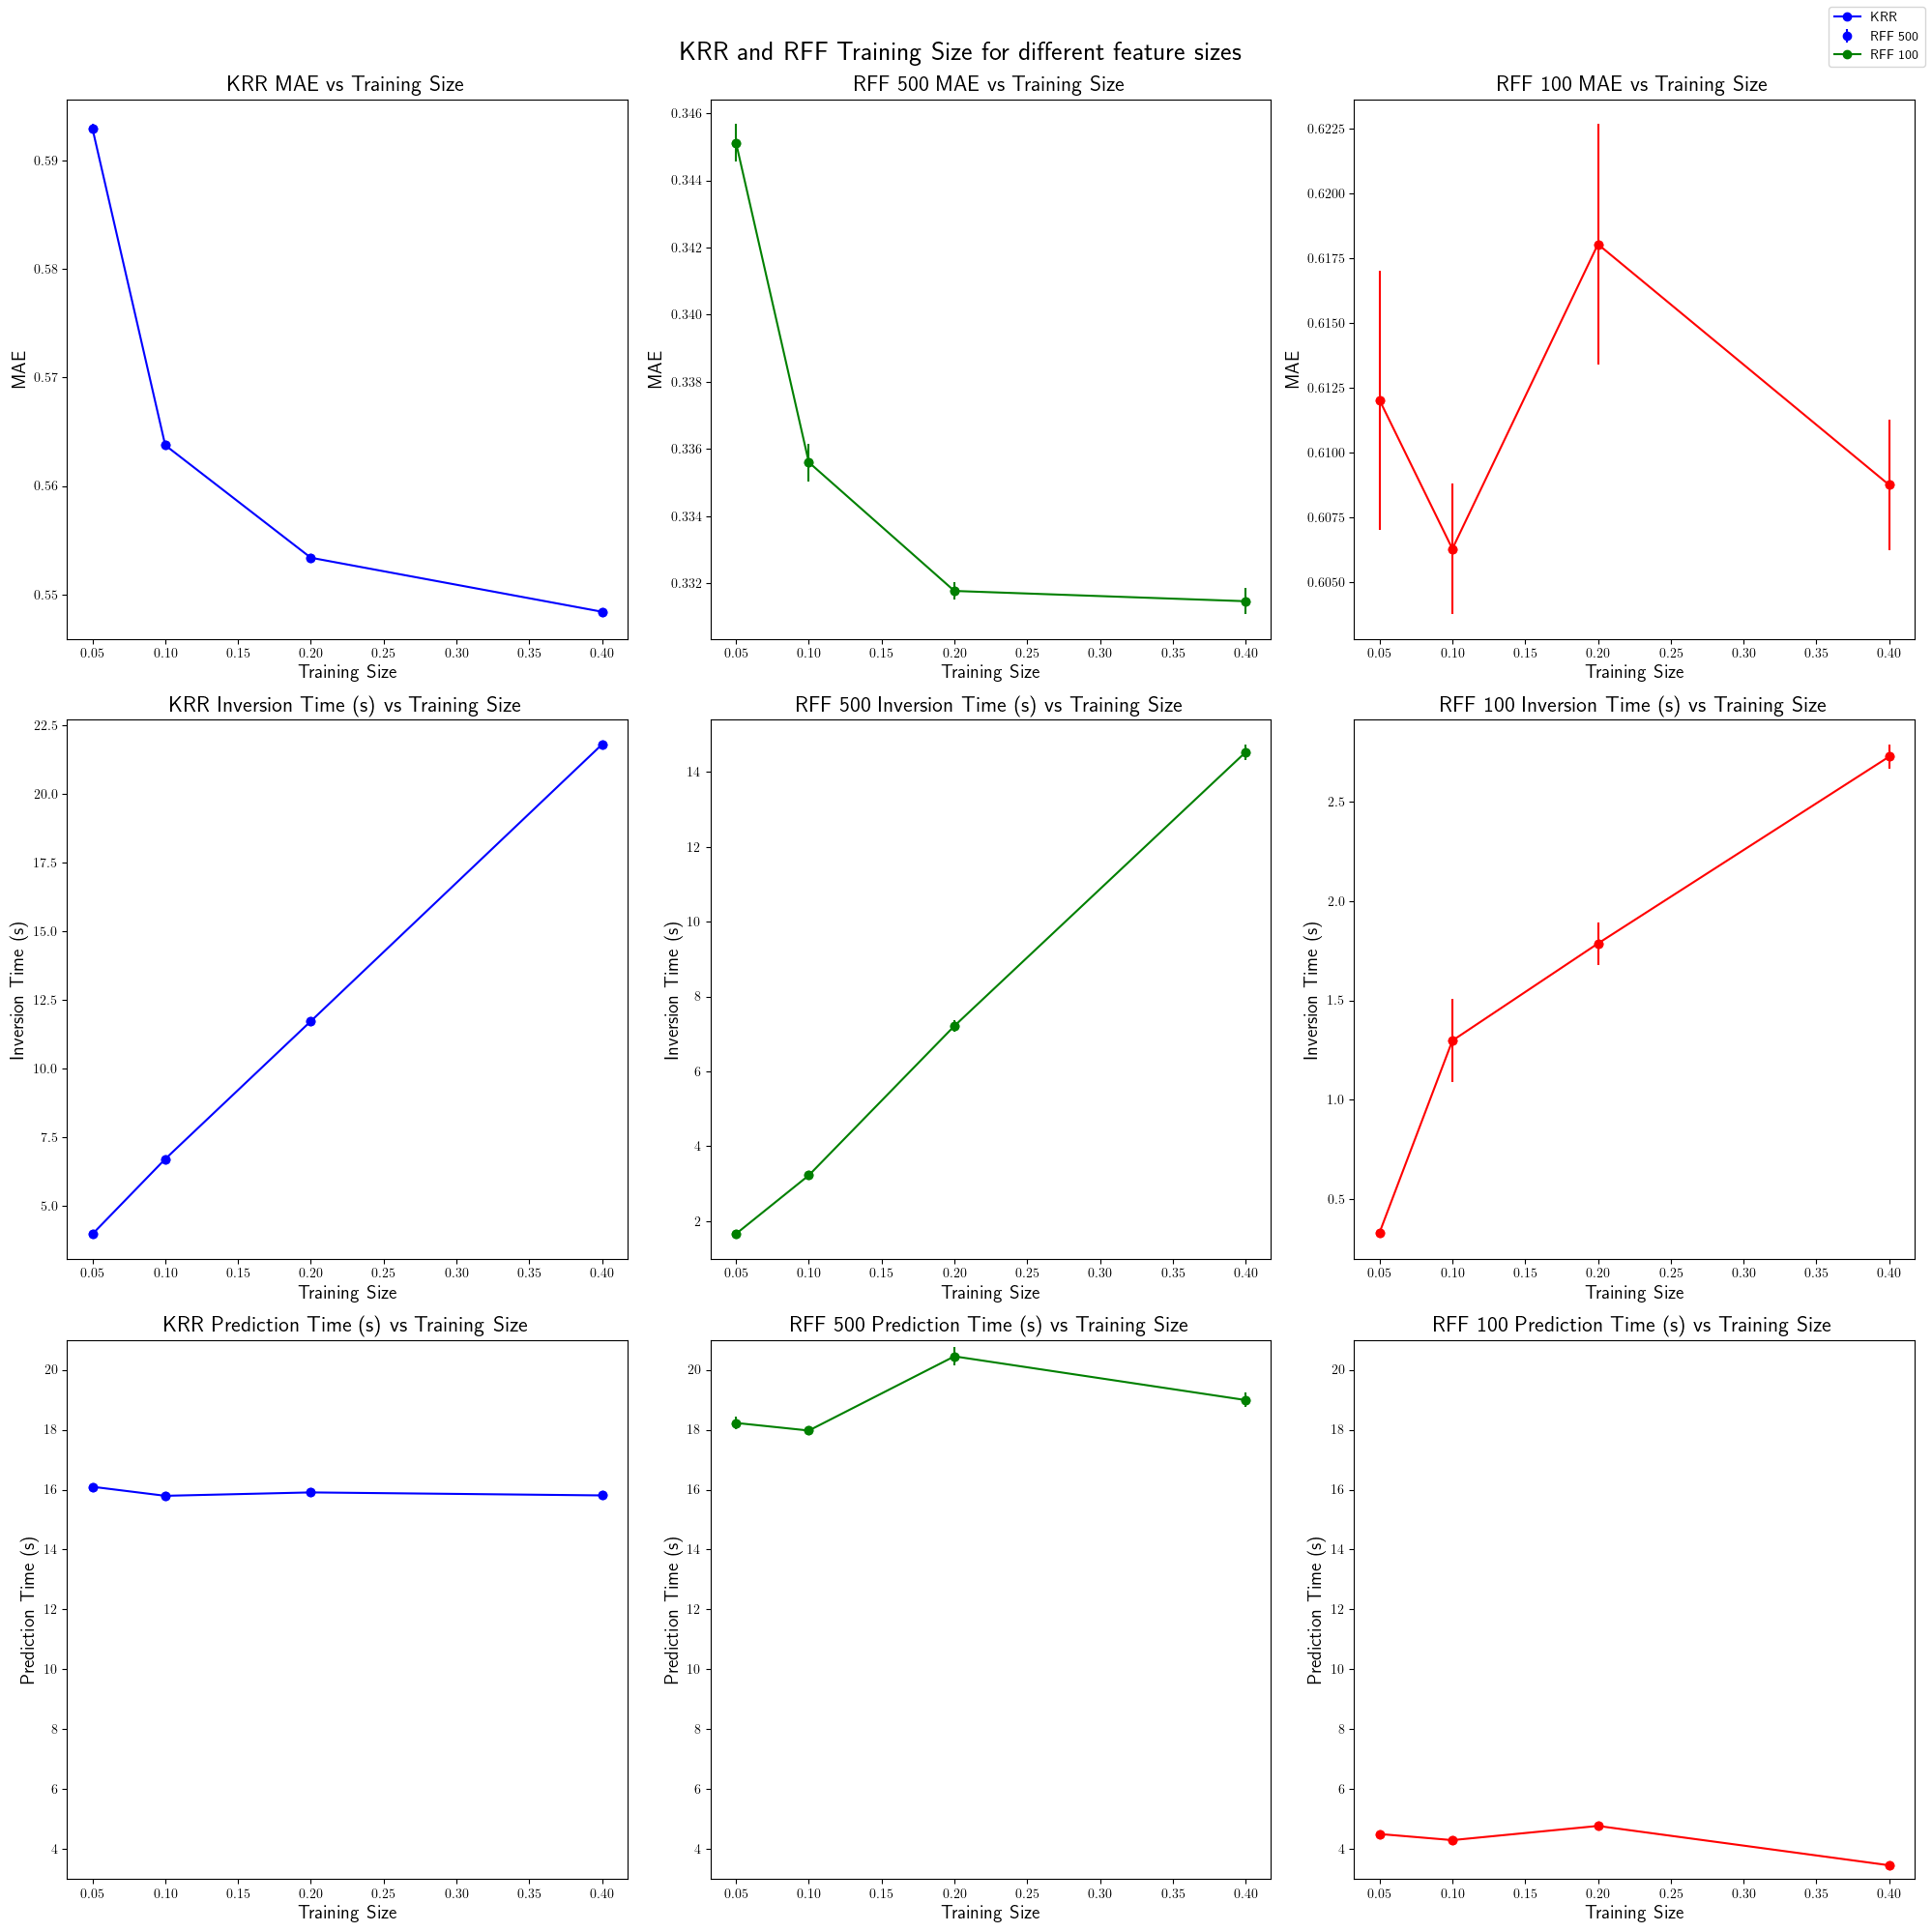

In [29]:
# Combine all 3 dataset plots onto one giant subplot
plt.rc('text', usetex=True)
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
x_axis = [0.05, 0.1, 0.2, 0.4]
y_label_dict = {'maes': 'MAE', 'inversion_time': 'Inversion Time (s)', 'prediction_time': 'Prediction Time (s)', 'time_to_invert': 'Inversion Time (s)', 'time_to_predict': 'Prediction Time (s)'}

data_1000 = np.load('dataset/qm9_1000_rff.npz')
data_500 = np.load('time_diff/RFF_n500.npz')
data_100 = np.load('time_diff/RFF_n100.npz')

data_1000_keys = list(data_1000.keys())
data_500_keys = list(data_500.keys())
data_100_keys = list(data_100.keys())

for i, key in enumerate(data_1000_keys):
    summed = np.sum(data_1000[key], axis=0)
    stddev = np.std(data_1000[key], axis=0, ddof=0)
    axs[i, 0].plot(x_axis, summed, marker='o', color='b')
    axs[i, 0].errorbar(x_axis, summed, yerr=stddev, color='b', fmt='o')
    axs[i, 0].set_ylabel(y_label_dict[key], fontsize=14)
    axs[i, 0].set_xlabel('Training Size', fontsize=14)
    axs[i, 0].set_title('KRR ' + y_label_dict[key] + ' vs Training Size', fontsize=16)
    # axs[1,0].legend(['KRR'], loc='upper right')

for i, key in enumerate(data_500_keys):
    summed = np.sum(data_500[key], axis=0)
    stddev = np.std(data_500[key], axis=0, ddof=0)
    axs[i, 1].plot(x_axis, summed, marker='o', color='g')
    axs[i, 1].errorbar(x_axis, summed, yerr=stddev, color='g', fmt='o')
    axs[i, 1].set_ylabel(y_label_dict[key], fontsize=14)
    axs[i, 1].set_xlabel('Training Size', fontsize=14)
    axs[i, 1].set_title('RFF 500 ' + y_label_dict[key] + ' vs Training Size', fontsize=16)
    # axs[1,1].legend(['RFF 500'], loc='upper right')

for i, key in enumerate(data_100_keys):
    summed = np.sum(data_100[key], axis=0)
    stddev = np.std(data_100[key], axis=0, ddof=0)
    axs[i, 2].plot(x_axis, summed, marker='o', color='r')
    axs[i, 2].errorbar(x_axis, summed, yerr=stddev, color='r', fmt='o')
    axs[i, 2].set_ylabel(y_label_dict[key], fontsize=14)
    axs[i, 2].set_xlabel('Training Size', fontsize=14)
    axs[i, 2].set_title('RFF 100 ' + y_label_dict[key] + ' vs Training Size', fontsize=16)
    # axs[1,2].legend(['RFF 100'], loc='upper right')

axs[2,0].set_ylim([3, 21])
axs[2,1].set_ylim([3, 21])
axs[2,2].set_ylim([3, 21])
# Figure title
fig.suptitle('KRR and RFF Training Size for different feature sizes', fontsize=20)
# Show figure legend
fig.legend(['KRR', 'RFF 500', 'RFF 100'], loc='upper right')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('KRR_RFF_training_size_vs_all.pdf')
plt.show()
    